<a href="https://colab.research.google.com/github/Edersao/Curso_Data_Scientist/blob/main/Prueba4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#para no batallar con .head()
pd.options.display.max_rows = 8
pd.options.display.max_columns = 10

1. Lee en dos dataframes: gdp y unemployment, el contenido de los archivos GDP.csv y Unemployment.
csv, respectivamente (ubicados en el apartado “Archivos adjuntos” de la plataforma), que almacenan por país, el PIB por persona empleada y la tasa de desempleo desde 1991.

In [5]:
gdp= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/datos_prueba4/1697667169730-GDP.csv')
unemployment= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/datos_prueba4/1697667179137-Unemployment.csv')
gdp.head()

,Country Name,Country Code,1991,1992,1993,...,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,...,8754.30486,8578.345113,8456.65185,8238.098259,8246.351581
2,Angola,AGO,14384.761840,13120.13335,9642.526050,...,21126.64014,19854.887150,19125.64020,18079.185140,17339.271710
3,Albania,ALB,9013.241061,8369.95369,9436.839108,...,31715.69187,31448.227580,31589.09409,31104.970770,31009.390130
4,Andorra,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [6]:
unemployment.head()

,Country Name,Country Code,1991,1992,1993,...,2015,2016,2017,2018,2019
0,Aruba,ABW,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,11.380000,11.46,11.61,...,11.390000,11.31,11.18,11.06,10.98
2,Angola,AGO,3.750000,3.78,3.85,...,7.260000,7.20,7.10,7.00,6.93
3,Albania,ALB,16.219999,16.33,16.52,...,17.190001,15.42,13.62,12.30,11.47
4,Andorra,AND,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


El PIB por persona empleada es el producto interno bruto (PIB) dividido por el total de personas
empleadas en la economía (no referimos a el como GDP).

El desempleo se refiere a la proporción de la fuerza laboral que no tiene trabajo, pero que
está disponible y en busca de empleo.

2. A partir de los dataframes anteriores, obtén uno (info2019) en donde únicamente almacenes la información de ambos indicadores en el año 2019. Haz los cambios necesarios para que quede con la siguiente estructura:

In [11]:
gdp2019=gdp[[ 'Country Code', '2019']]
unemployment2019=unemployment[[ 'Country Code', '2019']]
gdp2019.rename(columns={'2019':'GDP'},inplace=True)
unemployment2019.rename(columns={'2019':'Unemployment'},inplace=True)
info2019=gdp2019.merge(unemployment2019,left_on='Country Code',right_on='Country Code',how='inner')
info2019.head()

<ipython-input-11-909949963eba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp2019.rename(columns={'2019':'GDP'},inplace=True)
<ipython-input-11-909949963eba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment2019.rename(columns={'2019':'Unemployment'},inplace=True)


,Country Code,GDP,Unemployment
0,ABW,NaN,NaN
1,AFG,8246.351581,10.98
2,AGO,17339.271710,6.93
3,ALB,31009.390130,11.47
4,AND,NaN,NaN


3. Grafica el dataframe anterior, utilizando la plataforma Matplotlib, para visualizar la distribución de estos índices a través de histogramas en ejes duales. Personaliza las propiedades del gráfico para que se vea de la siguiente manera:

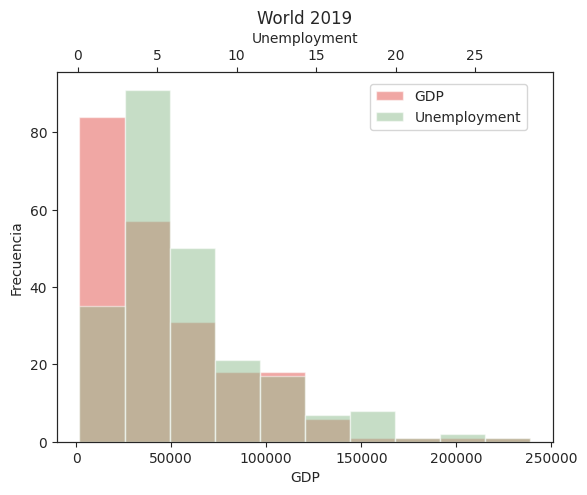

In [26]:
sns.set_palette('Spectral')
sns.set_style('ticks')

fig,ax1 = plt.subplots()
ax1.hist('GDP',data=info2019,alpha=0.5,label='GDP')
ax1.set_xlabel('GDP')
ax1.set_ylabel('Frecuencia')

ax2 = ax1.twiny()
ax2.hist('Unemployment',data=info2019,alpha=0.5,color='darkseagreen')
ax2.set_xlabel('Unemployment')

plt.title('World 2019')
fig.legend(bbox_to_anchor=(0.87,0.87),)




4. Almacena en un dataframe (continents), el contenido del archivo Continents.csv (ubicado en el apartado “Archivos adjuntos” de la plataforma), que indica a qué continente y región pertenece cada país, y combínalo con el dataframe info2019, usando la columna Country Code, para obtener el dataframe continents_2019.

In [28]:
continents=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos/visualizacion/datos_prueba4/1697667198096-Continents.csv')
continents.head()

,Name,Country Code,Continent,Region
0,Afghanistan,AFG,Asia,Southern Asia
1,Åland Islands,ALA,Europe,Northern Europe
2,Albania,ALB,Europe,Southern Europe
3,Algeria,DZA,Africa,Northern Africa
4,American Samoa,ASM,Oceania,Polynesia


5. Del dataframe anterior, obtén los promedios por continente de ambos índices. Almacena el resultado en continents_group.

In [32]:
continent2019=continents.merge(info2019,left_on='Country Code',right_on='Country Code',how='inner')
continents_group=continent2019.groupby(['Continent']).mean()
continents_group

<ipython-input-32-17bd8d03e59c>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  continents_group=continent2019.groupby(['Continent']).mean()


,GDP,Unemployment
Continent,,
Africa,16870.222166,8.358113
Americas,41861.482377,7.554849
Asia,52018.493888,5.709600
Europe,85926.422765,6.761282
Oceania,36056.567613,5.731818


6. Crea una matriz en la que vayas añadiendo las siguientes subgráficas:


Text(0, 0.5, '')

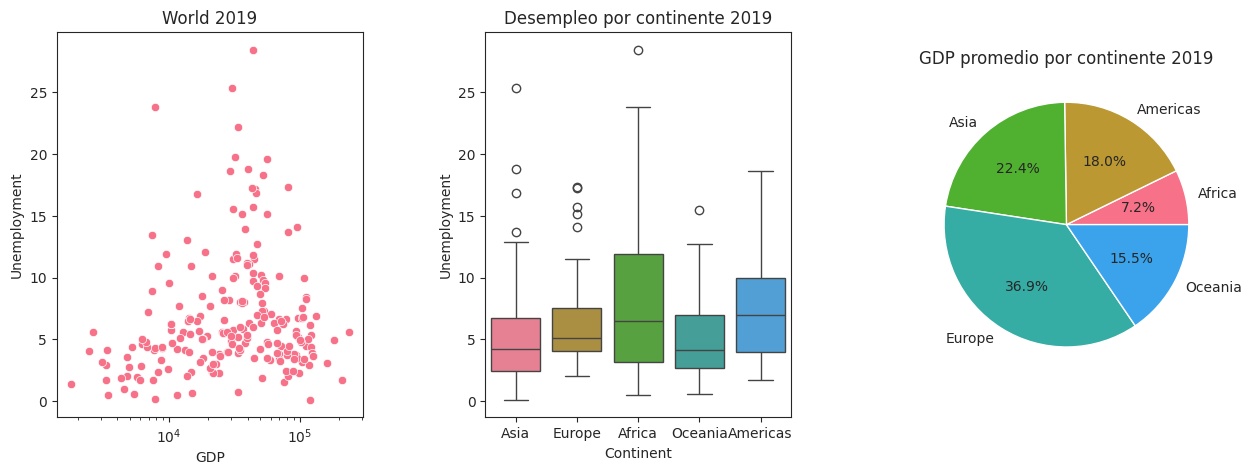

In [62]:
#sns.set_palette('husl')
fig,axs = plt.subplots(1,3,figsize=(15,5))
plt.subplots_adjust(wspace=0.4)

sns.scatterplot(x=info2019['GDP'],y=info2019['Unemployment'],ax=axs[0])
axs[0].set(xscale="log")
axs[0].set_title('World 2019')


sns.boxplot(x='Continent',y='Unemployment',hue='Continent',data=continent2019,ax=axs[1])
axs[1].set_title('Desempleo por continente 2019')

axs[2].pie(continents_group['GDP'],labels=continents_group.index,autopct='%1.1f%%')
axs[2].set_title('GDP promedio por continente 2019')
axs[2].set_ylabel('')


7. Almacena la información de México en un dataframe con la estructura mostrada y grafica ambos índices para visualizar la evolución a través de los años, utilizando ejes duales y Seaborn.

In [64]:
mexico=pd.concat([gdp[gdp['Country Name']=='Mexico'], unemployment[unemployment['Country Name']=='Mexico']], axis=0)
mexico.drop(['Country Name','Country Code'],axis=1,inplace=True)
mexico = mexico.T
mexico.index.name = 'Year'
mexico.columns.name = ''
mexico.columns = ['GDP','Unemployment']
mexico

,GDP,Unemployment
Year,,
1991,43868.90541,3.15
1992,43804.94070,3.24
1993,43077.84603,3.37
1994,44715.30806,4.44
...,...,...
2016,46079.84013,3.86
2017,46212.89809,3.42
2018,46217.76447,3.28
2019,45023.95098,3.48


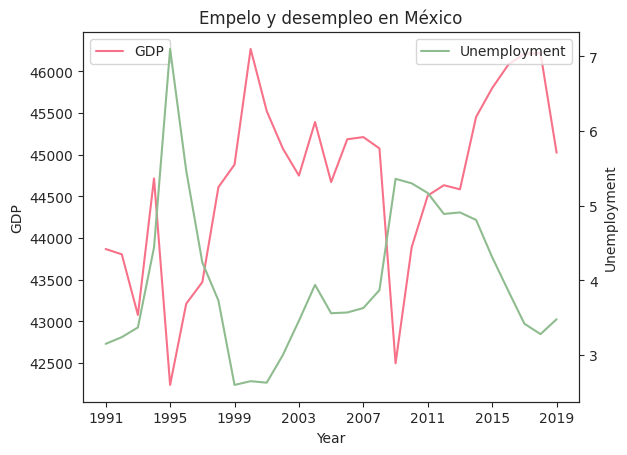

In [80]:
#ax1 = mexico['GDP'].plot(color='red')
#ax1.legend(loc='upper left')
#ax1.set_ylabel('GPD')
#ax2 = ax1.twinx()
#mexico['Unemployment'].plot(ax=ax2,color='darkseagreen')
#ax2.legend(loc='upper right')
#ax2.set_ylabel('Unemployment')

#plt.xticks(np.arange(0,len(mexico)+1,4))
#plt.title('Empelo y desempleo en México')
#plt.show()

ax1 = sns.lineplot(x=mexico.index,y=mexico['GDP'],label='GDP')
ax1.set_title('Empelo y desempleo en México')

ax2 = ax1.twinx()
sns.lineplot(x=mexico.index,y=mexico['Unemployment'],ax=ax2,color='darkseagreen',label='Unemployment')

plt.xticks(np.arange(0,len(mexico)+1,4))
plt.show()